In [6]:
%%capture
!apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
!pip install scholarly fuzzywuzzy levenshtein unidecode

In [2]:
from scholarly import scholarly
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime

now = datetime.now()
now = now.strftime("%d/%m/%Y")

# Retrieve the author's data and fill-in
search_query = scholarly.search_author('Emilio Martinez-Nunez')
author = scholarly.fill(next(search_query))

# Take a closer look at the first publication
author = scholarly.fill(author, sections=['counts','coauthors'])
print(author['name'])
print(author['affiliation'])
print('')
print('# citations = ',author['citedby'])
print('# last 5y   = ',author['citedby5y'])
print('  h-index   = ',author['hindex'])
cpy = author['cites_per_year']

Emilio Martinez-Nunez (ORCID: 0000-0001-6221-4977)
Professor of Physical Chemistry, Universidade de Santiago de Compostela
Total number of citations =  2704
Citations in the last 5 y =  1000
h-index =  29


Processing co-authors...


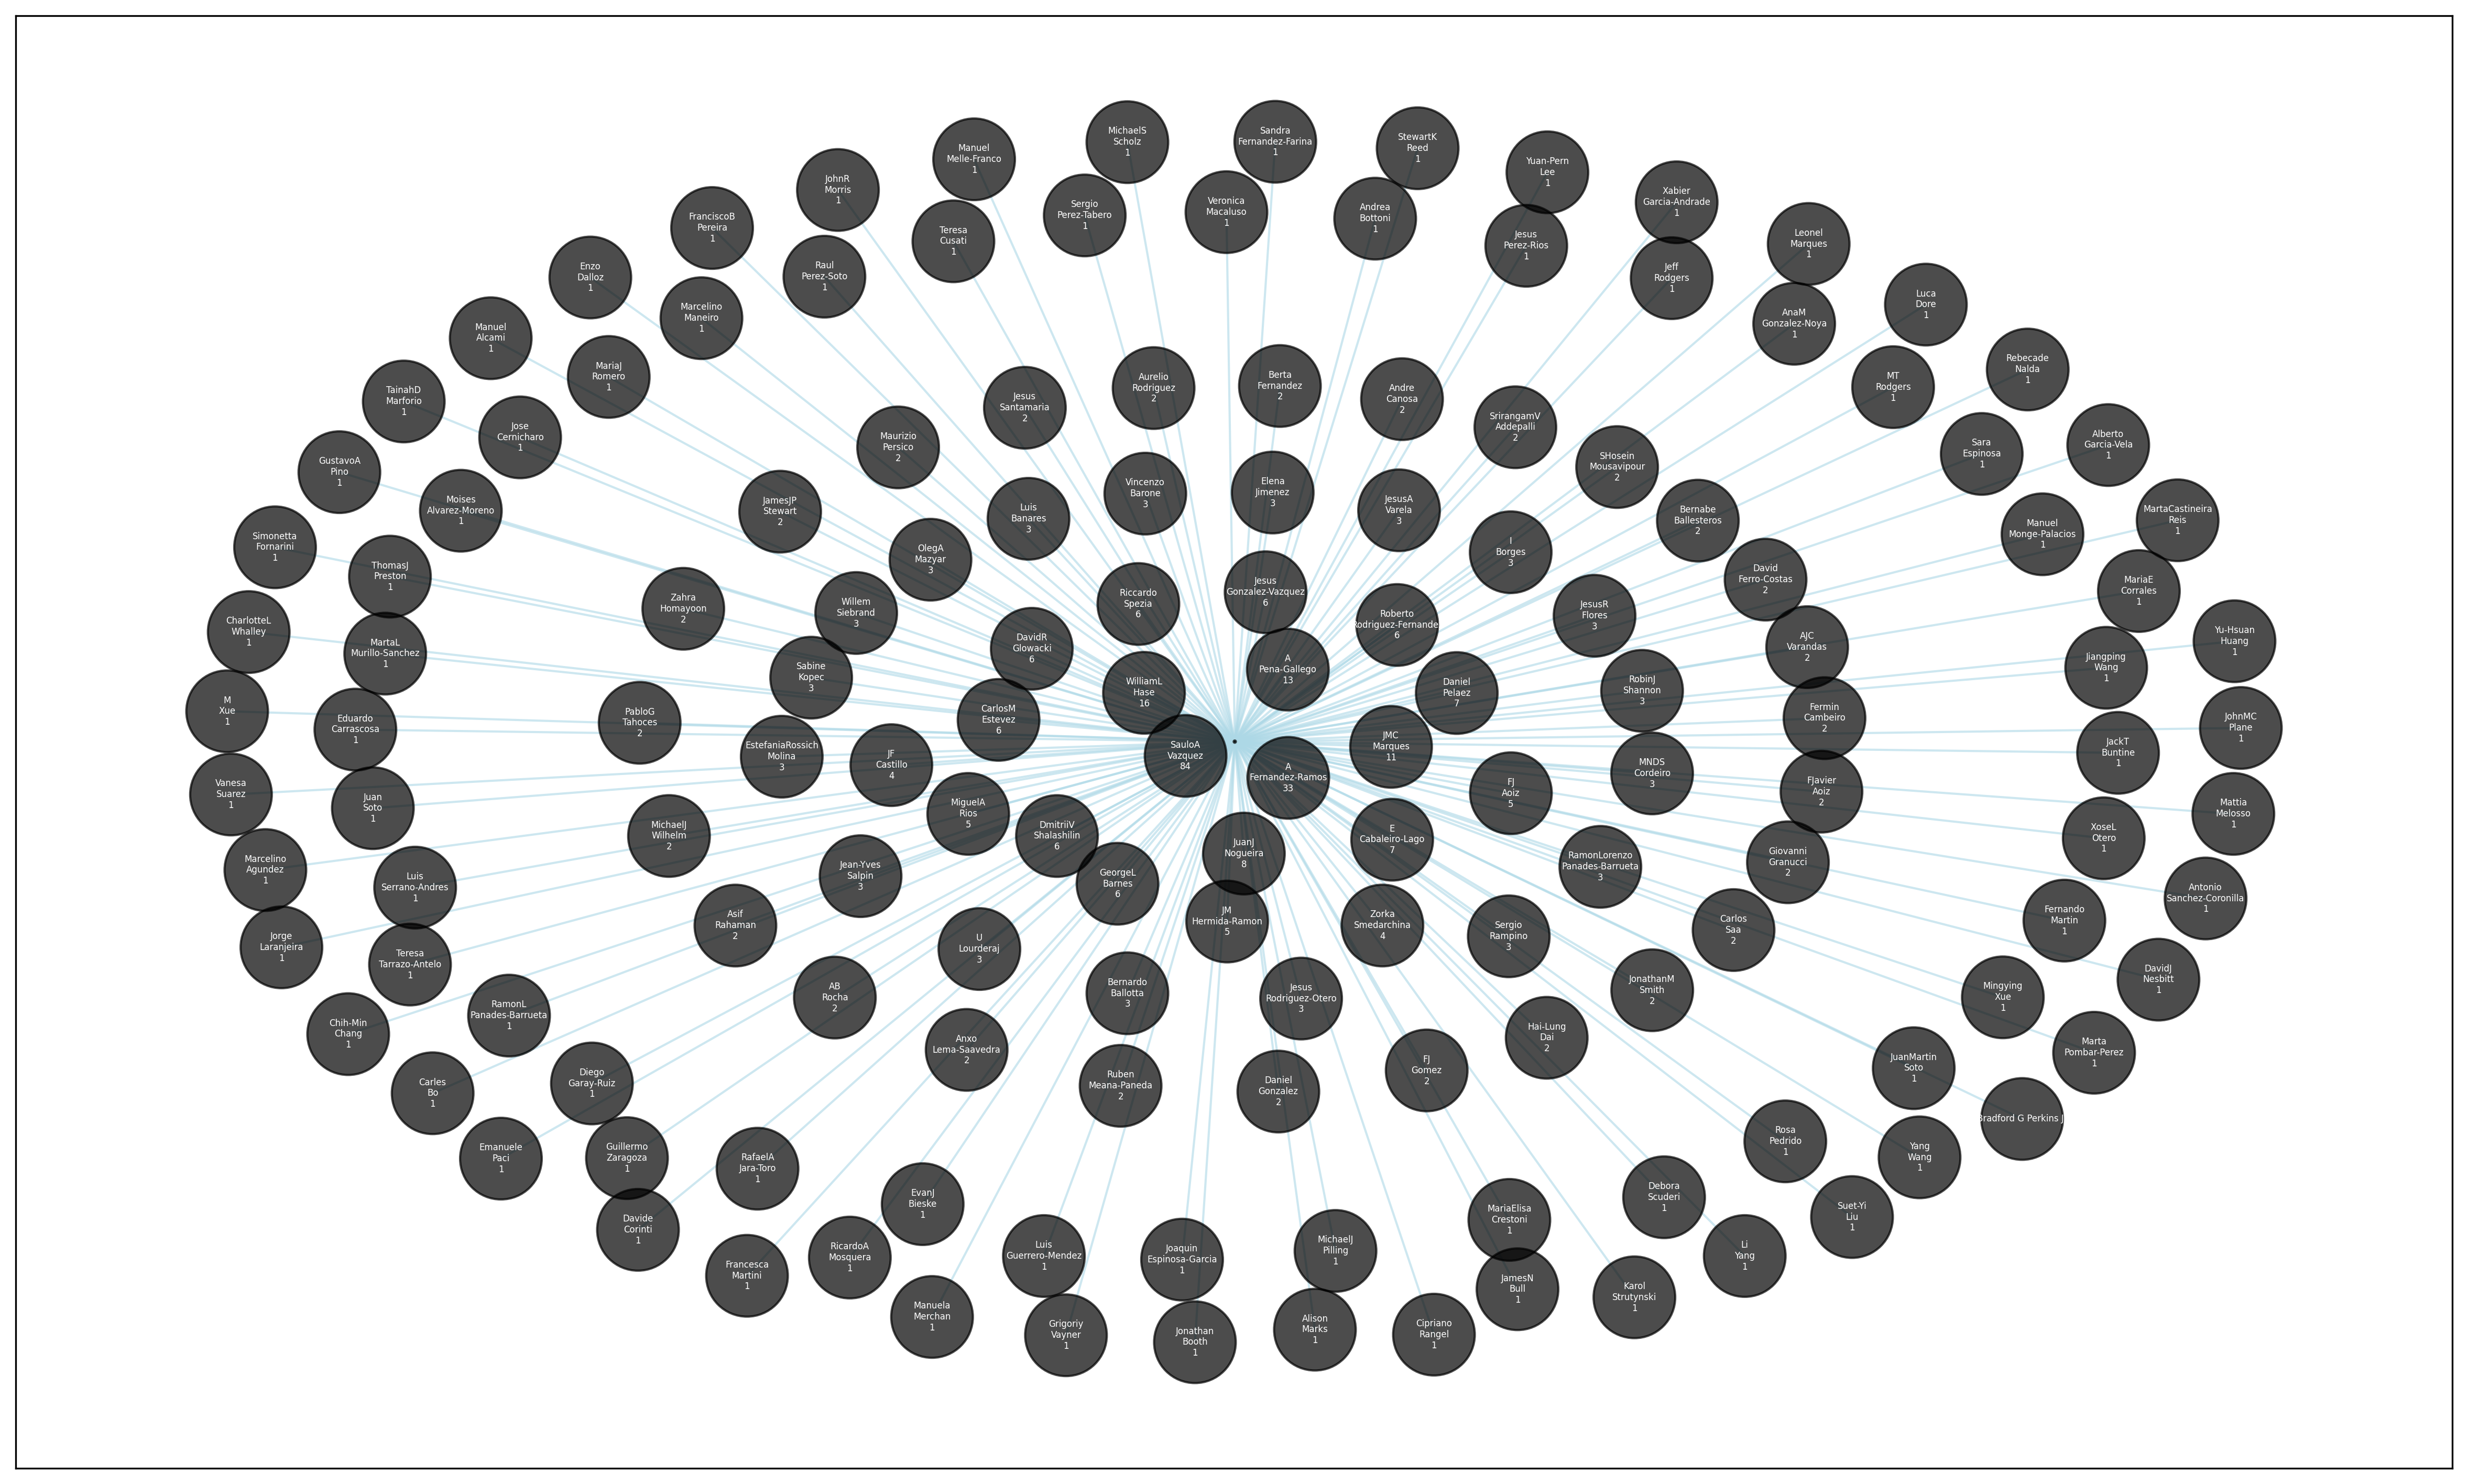

In [7]:
from unidecode import unidecode
author_list = ['Emilio Martinez-Nunez']
author_cont = [0]
print('Processing co-authors...')
for p in author['publications']:
    publication_filled = scholarly.fill(p)
    bib = publication_filled['bib']
    authors = bib['author'].split(' and ')

    for author in authors:
        author = author.replace('.', '')
        author = unidecode(author)
        #author = author.replace('ñ', 'n')
        #author = author.replace('á', 'a')
        #author = author.replace('é', 'e')
        #author = author.replace('í', 'i')
        #author = author.replace('ú', 'u')
        #author = ' '.join([n for n in author.split(' ') if len(n) > 1])
        if author == 'MARTINEZ-NUNEZ': continue
        if author == 'SA Vazquez': author = 'SauloA Vazquez'
        if author == 'SA Vazquez-Rodriguez': author = 'SauloA Vazquez'
        if author == 'Dmitry Shalashilin': author = 'DmitriiV Shalashilin'
        if author == 'WL Hase': author = 'William Hase'
        if author == 'Jorge Marques': author = 'JMC Marques'
        if author == 'Jesus Angel Varela Carrete': author = 'Jesus Varela'
        if author == 'CM Estevez': author = 'Carlos Estevez'
        if author == 'Javier Aoiz': author = 'FJ Aoiz'
        #if author == 'Juan José Nogueira' : author = 'Juan Nogueira'
        if author == 'Juan Jose Nogueira': author = 'Juan Nogueira'
        if author == 'Pablo Garcia Tahoces': author = 'Pablo Tahoces'
        if author == 'Jesus Flores': author = 'JR Flores'
        new = 1
        for i,ele in enumerate(author_list):
          ratio = fuzz.partial_ratio(author.lower(), ele.lower())
          if ratio > 80:
            new = 0
            author_cont[i] += 1
            break
        if new == 1:
          author_list.append(author)
          author_cont.append(1)

for i,ele in enumerate(author_list):
  x = ele.split(" ")
  if len(x) == 1: author_list[i] = x[0]+"\n"+str(author_cont[i])
  if len(x) == 2: author_list[i] = x[0]+"\n"+x[1]+"\n"+str(author_cont[i])
  if len(x) == 3: author_list[i] = x[0]+x[1]+"\n"+x[2]+"\n"+str(author_cont[i])

author_list[0] = ''
node_size = []

G = nx.Graph()
for ind,ele in enumerate(author_list):
  if ind == 0:
    G.add_node(ele)
  else:
    G.add_node(ele)
    G.add_edge(author_list[0],ele,weight=author_cont[ind])

pos = nx.spring_layout(G,k=0.5)
plt.figure(figsize=(20,12),dpi=300)
widths=nx.get_edge_attributes(G,'weight')
nodelist=G.nodes()
nodesize = [1]
for i in range(1,len(nodelist())):nodesize.append(1400)

nx.draw_networkx_nodes(G,pos,nodelist=nodelist,node_size=nodesize,node_color='black',alpha=0.7)
nx.draw_networkx_edges(G,pos,edgelist=widths.keys(),edge_color='lightblue',alpha=0.6)
nx.draw_networkx_labels(G,pos=pos,labels=dict(zip(nodelist,nodelist)),font_color='white',font_size=4)
plt.savefig('co_authors_'+str(now).replace("/","_")+'.png')
plt.show()